In [400]:
from xgboost import plot_importance
%run objects

In [354]:
# create labels
all_mses_most_recent_year = []
results = []
for n_games_back in possible_num_games_back:
    for exp_decay in possible_exponential_decays:
        print("-----------------------------------------------------------------------------------")
        print(f"N = {n_games_back}, ExpDecay = {exp_decay}.")
        print("-----------------------------------------------------------------------------------")
        # Create trainer
        x = trainer(n_games = n_games_back, exponential_downweight=exp_decay, with_glm = False)
        # Get Labels
        x.label_and_data_maker()
        # Train model
        mse = x.train()
        results.append(pd.DataFrame({"n_games_back" : [n_games_back], "exp_decay" : [exp_decay], 'average_mse' : [sum(mse)/len(mse)]}))
results = pd.concat(results, axis = 0)
min_mse = results["average_mse"].min()
results_best = results.query("average_mse == @min_mse")
print(f"Best number of games to look back is {results_best.n_games_back.values[0]}. Best Exp Decay is {results_best.exp_decay.values[0]}")

# Train best num games back with verbose true:
print("-------------------------")
print("Completing Final Training")
print("-------------------------")
# Create trainer
x = trainer(n_games = results_best.n_games_back.values[0], 
            exponential_downweight=results_best.exp_decay.values[0], 
            with_glm = False)
# Get Labels
x.label_and_data_maker()
# Train model
x.train()


-----------------------------------------------------------------------------------
N = 10, ExpDecay = 1.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:01<00:00,  7.83it/s]


Getting Womens Training Data:


100%|██████████| 13/13 [00:01<00:00, 10.75it/s]


Mens accuracy for 2021 is 65.15 percent. MSE is 0.240407. Log loss is 0.766689
Womens accuracy for 2021 is 73.02 percent. MSE is 0.175189. Log loss is 0.55246
Overall MSE for 2021 is 0.208556
Mens accuracy for 2022 is 61.19 percent. MSE is 0.237304. Log loss is 0.72037
Womens accuracy for 2022 is 74.63 percent. MSE is 0.154874. Log loss is 0.459591
Overall MSE for 2022 is 0.196089
Mens accuracy for 2023 is 53.73 percent. MSE is 0.304586. Log loss is 0.886545
Womens accuracy for 2023 is 73.13 percent. MSE is 0.171268. Log loss is 0.504148
Overall MSE for 2023 is 0.237927
-----------------------------------------------------------------------------------
N = 10, ExpDecay = 0.98.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:01<00:00, 12.04it/s]


Getting Womens Training Data:


100%|██████████| 13/13 [00:01<00:00,  9.28it/s]


Mens accuracy for 2021 is 66.67 percent. MSE is 0.242619. Log loss is 0.750049
Womens accuracy for 2021 is 74.6 percent. MSE is 0.168849. Log loss is 0.517079
Overall MSE for 2021 is 0.206592
Mens accuracy for 2022 is 64.18 percent. MSE is 0.234777. Log loss is 0.691378
Womens accuracy for 2022 is 77.61 percent. MSE is 0.152259. Log loss is 0.456933
Overall MSE for 2022 is 0.193518
Mens accuracy for 2023 is 49.25 percent. MSE is 0.307053. Log loss is 0.923139
Womens accuracy for 2023 is 67.16 percent. MSE is 0.178696. Log loss is 0.531601
Overall MSE for 2023 is 0.242874
-----------------------------------------------------------------------------------
N = 10, ExpDecay = 0.95.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:01<00:00, 11.51it/s]


Getting Womens Training Data:


100%|██████████| 13/13 [00:00<00:00, 13.53it/s]


Mens accuracy for 2021 is 60.61 percent. MSE is 0.258069. Log loss is 0.785705
Womens accuracy for 2021 is 76.19 percent. MSE is 0.175225. Log loss is 0.541254
Overall MSE for 2021 is 0.217611
Mens accuracy for 2022 is 65.67 percent. MSE is 0.22853. Log loss is 0.707142
Womens accuracy for 2022 is 76.12 percent. MSE is 0.167478. Log loss is 0.493186
Overall MSE for 2022 is 0.198004
Mens accuracy for 2023 is 50.75 percent. MSE is 0.300773. Log loss is 0.90929
Womens accuracy for 2023 is 70.15 percent. MSE is 0.174184. Log loss is 0.520852
Overall MSE for 2023 is 0.237479
-----------------------------------------------------------------------------------
N = 10, ExpDecay = 0.9.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:01<00:00, 12.50it/s]


Getting Womens Training Data:


100%|██████████| 13/13 [00:00<00:00, 13.93it/s]


Mens accuracy for 2021 is 60.61 percent. MSE is 0.255033. Log loss is 0.779845
Womens accuracy for 2021 is 74.6 percent. MSE is 0.175073. Log loss is 0.529536
Overall MSE for 2021 is 0.215983
Mens accuracy for 2022 is 64.18 percent. MSE is 0.24437. Log loss is 0.760618
Womens accuracy for 2022 is 77.61 percent. MSE is 0.161316. Log loss is 0.48717
Overall MSE for 2022 is 0.202843
Mens accuracy for 2023 is 47.76 percent. MSE is 0.293255. Log loss is 0.876657
Womens accuracy for 2023 is 76.12 percent. MSE is 0.172392. Log loss is 0.516482
Overall MSE for 2023 is 0.232823
-----------------------------------------------------------------------------------
N = 15, ExpDecay = 1.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:14<00:00,  1.15s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:17<00:00,  1.33s/it]


Mens accuracy for 2021 is 65.15 percent. MSE is 0.228987. Log loss is 0.685914
Womens accuracy for 2021 is 76.19 percent. MSE is 0.156455. Log loss is 0.474838
Overall MSE for 2021 is 0.193564
Mens accuracy for 2022 is 64.18 percent. MSE is 0.243425. Log loss is 0.738323
Womens accuracy for 2022 is 77.61 percent. MSE is 0.157014. Log loss is 0.484007
Overall MSE for 2022 is 0.200219
Mens accuracy for 2023 is 53.73 percent. MSE is 0.30518. Log loss is 0.883255
Womens accuracy for 2023 is 71.64 percent. MSE is 0.165054. Log loss is 0.504359
Overall MSE for 2023 is 0.235117
-----------------------------------------------------------------------------------
N = 15, ExpDecay = 0.98.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:15<00:00,  1.19s/it]


Mens accuracy for 2021 is 62.12 percent. MSE is 0.229095. Log loss is 0.676608
Womens accuracy for 2021 is 73.02 percent. MSE is 0.178086. Log loss is 0.54377
Overall MSE for 2021 is 0.204183
Mens accuracy for 2022 is 65.67 percent. MSE is 0.239918. Log loss is 0.745932
Womens accuracy for 2022 is 76.12 percent. MSE is 0.155444. Log loss is 0.484251
Overall MSE for 2022 is 0.197681
Mens accuracy for 2023 is 56.72 percent. MSE is 0.278237. Log loss is 0.85047
Womens accuracy for 2023 is 74.63 percent. MSE is 0.178005. Log loss is 0.537632
Overall MSE for 2023 is 0.228121
-----------------------------------------------------------------------------------
N = 15, ExpDecay = 0.95.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:14<00:00,  1.11s/it]


Mens accuracy for 2021 is 62.12 percent. MSE is 0.247944. Log loss is 0.724088
Womens accuracy for 2021 is 77.78 percent. MSE is 0.165894. Log loss is 0.496713
Overall MSE for 2021 is 0.207873
Mens accuracy for 2022 is 64.18 percent. MSE is 0.255617. Log loss is 0.815712
Womens accuracy for 2022 is 76.12 percent. MSE is 0.162243. Log loss is 0.475588
Overall MSE for 2022 is 0.20893
Mens accuracy for 2023 is 58.21 percent. MSE is 0.266263. Log loss is 0.787951
Womens accuracy for 2023 is 76.12 percent. MSE is 0.168913. Log loss is 0.513708
Overall MSE for 2023 is 0.217588
-----------------------------------------------------------------------------------
N = 15, ExpDecay = 0.9.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:15<00:00,  1.21s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:14<00:00,  1.08s/it]


Mens accuracy for 2021 is 63.64 percent. MSE is 0.251578. Log loss is 0.77798
Womens accuracy for 2021 is 74.6 percent. MSE is 0.163086. Log loss is 0.492689
Overall MSE for 2021 is 0.208361
Mens accuracy for 2022 is 68.66 percent. MSE is 0.250094. Log loss is 0.782902
Womens accuracy for 2022 is 80.6 percent. MSE is 0.148962. Log loss is 0.455982
Overall MSE for 2022 is 0.199528
Mens accuracy for 2023 is 56.72 percent. MSE is 0.276368. Log loss is 0.825993
Womens accuracy for 2023 is 80.6 percent. MSE is 0.156209. Log loss is 0.476619
Overall MSE for 2023 is 0.216289
-----------------------------------------------------------------------------------
N = 20, ExpDecay = 1.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:15<00:00,  1.18s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:14<00:00,  1.10s/it]


Mens accuracy for 2021 is 65.15 percent. MSE is 0.235648. Log loss is 0.72339
Womens accuracy for 2021 is 74.6 percent. MSE is 0.167801. Log loss is 0.503071
Overall MSE for 2021 is 0.202513
Mens accuracy for 2022 is 67.16 percent. MSE is 0.226243. Log loss is 0.689896
Womens accuracy for 2022 is 80.6 percent. MSE is 0.13954. Log loss is 0.445358
Overall MSE for 2022 is 0.182891
Mens accuracy for 2023 is 56.72 percent. MSE is 0.303529. Log loss is 0.912705
Womens accuracy for 2023 is 70.15 percent. MSE is 0.175407. Log loss is 0.522919
Overall MSE for 2023 is 0.239468
-----------------------------------------------------------------------------------
N = 20, ExpDecay = 0.98.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:15<00:00,  1.18s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:13<00:00,  1.08s/it]


Mens accuracy for 2021 is 65.15 percent. MSE is 0.23421. Log loss is 0.707386
Womens accuracy for 2021 is 73.02 percent. MSE is 0.180115. Log loss is 0.560228
Overall MSE for 2021 is 0.207791
Mens accuracy for 2022 is 68.66 percent. MSE is 0.226768. Log loss is 0.72645
Womens accuracy for 2022 is 80.6 percent. MSE is 0.144696. Log loss is 0.463127
Overall MSE for 2022 is 0.185732
Mens accuracy for 2023 is 58.21 percent. MSE is 0.283598. Log loss is 0.871484
Womens accuracy for 2023 is 71.64 percent. MSE is 0.175951. Log loss is 0.527328
Overall MSE for 2023 is 0.229774
-----------------------------------------------------------------------------------
N = 20, ExpDecay = 0.95.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:14<00:00,  1.13s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:15<00:00,  1.17s/it]


Mens accuracy for 2021 is 62.12 percent. MSE is 0.250818. Log loss is 0.724142
Womens accuracy for 2021 is 74.6 percent. MSE is 0.171287. Log loss is 0.513399
Overall MSE for 2021 is 0.211977
Mens accuracy for 2022 is 65.67 percent. MSE is 0.230123. Log loss is 0.744791
Womens accuracy for 2022 is 77.61 percent. MSE is 0.149581. Log loss is 0.461604
Overall MSE for 2022 is 0.189852
Mens accuracy for 2023 is 56.72 percent. MSE is 0.275951. Log loss is 0.850783
Womens accuracy for 2023 is 73.13 percent. MSE is 0.176357. Log loss is 0.524652
Overall MSE for 2023 is 0.226154
-----------------------------------------------------------------------------------
N = 20, ExpDecay = 0.9.
-----------------------------------------------------------------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:15<00:00,  1.16s/it]


Getting Womens Training Data:


100%|██████████| 13/13 [00:15<00:00,  1.16s/it]


Mens accuracy for 2021 is 57.58 percent. MSE is 0.267258. Log loss is 0.832956
Womens accuracy for 2021 is 73.02 percent. MSE is 0.162952. Log loss is 0.47887
Overall MSE for 2021 is 0.216318
Mens accuracy for 2022 is 64.18 percent. MSE is 0.242273. Log loss is 0.746666
Womens accuracy for 2022 is 76.12 percent. MSE is 0.150105. Log loss is 0.459324
Overall MSE for 2022 is 0.196189
Mens accuracy for 2023 is 64.18 percent. MSE is 0.229222. Log loss is 0.713456
Womens accuracy for 2023 is 76.12 percent. MSE is 0.163759. Log loss is 0.490662
Overall MSE for 2023 is 0.19649
Best number of games to look back is 20. Best Exp Decay is 0.9
-------------------------
Completing Final Training
-------------------------
Getting Mens Training Data:


100%|██████████| 13/13 [00:01<00:00, 11.35it/s]


Getting Womens Training Data:


100%|██████████| 13/13 [00:00<00:00, 13.56it/s]


Mens accuracy for 2021 is 57.58 percent. MSE is 0.267258. Log loss is 0.832956
Womens accuracy for 2021 is 73.02 percent. MSE is 0.162952. Log loss is 0.47887
Overall MSE for 2021 is 0.216318
Mens accuracy for 2022 is 64.18 percent. MSE is 0.242273. Log loss is 0.746666
Womens accuracy for 2022 is 76.12 percent. MSE is 0.150105. Log loss is 0.459324
Overall MSE for 2022 is 0.196189
Mens accuracy for 2023 is 64.18 percent. MSE is 0.229222. Log loss is 0.713456
Womens accuracy for 2023 is 76.12 percent. MSE is 0.163759. Log loss is 0.490662
Overall MSE for 2023 is 0.19649


[0.21631788924691128, 0.1961890424066473, 0.19649035624903696]

In [345]:
results

[]

In [368]:
x.features_men

,past_n_record_T1,get_tourney_rank_T1,get_team_effect_T1,historical_team_effect_T1,get_sos_T1,FGM_mean_T1,FGA_mean_T1,FGM3_mean_T1,FGA3_mean_T1,FTM_mean_T1,...,FTA_opp_max_T2,OR_opp_max_T2,DR_opp_max_T2,Ast_opp_max_T2,TO_opp_max_T2,Stl_opp_max_T2,Blk_opp_max_T2,mov_opp_max_T2,seed_diff,effect_diff
0,0.850028,16,-0.684294,-0.867442,-1.972836,8.554066,21.422697,1.851490,6.175074,8.481192,...,24.2757,18.900,24.3,11.691702,14.4,5.31441,4.00000,10.62882,0,-0.531293
0,0.714606,3,2.338696,1.039881,1.427628,11.991647,24.300555,2.782166,7.382886,7.406415,...,25.2000,11.664,21.6,16.767000,18.9,9.72000,11.70000,2.91600,-11,1.242605
0,1.000000,5,2.409294,0.787235,0.085914,10.278948,21.523864,2.887903,8.062656,7.494091,...,27.9000,13.122,23.4,20.000000,16.2,8.00000,5.90490,8.00000,-7,0.448196
0,0.735213,7,2.351121,0.901252,0.791581,12.042469,25.982649,3.791066,8.989249,8.502957,...,22.6800,10.800,20.7,13.778100,12.0,5.83200,6.48000,6.48000,-3,0.776432
0,0.917400,1,3.624952,1.537653,1.569966,11.823380,24.666031,2.857872,6.912738,7.770277,...,12.3930,12.000,22.5,12.400290,14.4,7.67637,4.72392,8.85735,-15,3.628387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.696085,5,1.987568,0.742906,0.725798,12.875669,26.225692,3.354124,8.687522,6.188164,...,20.2500,10.530,23.0,11.153700,15.0,6.00000,6.30000,5.31441,3,-0.346828
0,0.649718,6,1.483456,1.451841,0.820046,11.796096,25.446116,4.129967,10.939688,5.961661,...,14.0000,11.700,27.0,13.000000,9.0,6.48000,4.86000,3.93660,1,-0.880843
0,0.681495,4,1.907654,1.464884,0.761430,11.951959,26.037496,3.845728,10.851110,5.547723,...,25.0000,9.900,26.0,16.000000,12.0,7.29000,5.40000,7.00000,-1,-0.079914
0,0.909826,9,2.144061,0.415815,0.205351,12.389131,26.043297,4.166237,11.265205,5.965397,...,14.0000,11.700,27.0,13.000000,9.0,6.48000,4.86000,3.93660,4,-0.220237


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

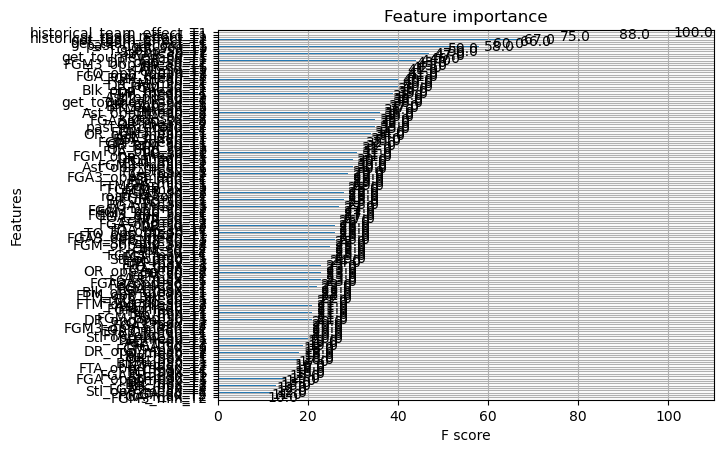

In [334]:
model = x.model_men.xgb
plot_importance(model)

In [401]:
# create 2024 tournement object
tourney_2024 = tournament(year=2024, mens_model=x.model_men, womens_model = x.model_women, 
                          n_games = results_best.n_games_back.values[0], 
                          exponential_downweight=results_best.exp_decay.values[0])

In [402]:
# predict all for submission
submission = tourney_2024.predict_all_including_non_possible()

Getting 2024 mens tournement predicitions...


  0%|          | 0/65341 [00:00<?, ?it/s]


KeyError: nan

In [ ]:
# simulate tournemnets for bracket completion
mens_sim = tourney_2024.predict_exact_tourney(gender = "M", print_results=True)

Simulating Round 0...
Seed X16b. Wagner beats seed X16a Howard (with probability 0.5668806664908966)
Seed Y10b. Virginia beats seed Y10a Colorado St (with probability 0.48390715002627493)
Seed Y16a. Grambling beats seed Y16b Montana St (with probability 0.3718033832167198)
Seed Z10b. Colorado beats seed Z10a Boise St (with probability 0.5256490767493995)
Simulating Round 1...
Seed W01. Connecticut beats seed W16 Stetson (with probability 0.9485798361049517)
Seed W02. Iowa St beats seed W15 S Dakota St (with probability 0.7391040100887682)
Seed W03. Illinois beats seed W14 Morehead St (with probability 0.6343533981113305)
Seed W04. Auburn beats seed W13 Yale (with probability 0.6486222542308479)
Seed W05. San Diego St beats seed W12 UAB (with probability 0.6060825855385796)
Seed W06. BYU beats seed W11 Duquesne (with probability 0.552218744228095)
Seed W06. Drake beats seed W11 Washington St (with probability 0.552218744228095)
Seed W09. Northwestern beats seed W08 FL Atlantic (with pro

In [ ]:
# get team round probabilities
tourney_2024.get_team_round_probabilities(gender = "M")[0:50]

,TeamName,Round of 64,Round of 32,Sweet 16,Elite Eight,Final Four,Championship,Champion


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2553,2024,Z12,1241
2554,2024,Z13,1436
2555,2024,Z14,1324
2556,2024,Z15,1443


,Season,Seed,TeamID,M_W,ReigonSeed,play_in_seed


In [ ]:
def check_submission_probs(team_name_1, team_name_2):
    sub = pd.read_csv("submission_1.csv")
    team_id_1 = teams.query("TeamName == @team_name_1").iloc[0].TeamID
    team_id_2 = teams.query("TeamName == @team_name_2").iloc[0].TeamID
    team_ids = [team_id_1, team_id_2]
    game_id = f"2023_{min(team_ids)}_{max(team_ids)}"
    entry = sub.query("ID == @game_id")
    if team_id_1 == min(team_ids):
        return f"The probability of {team_name_1} beating {team_name_2} is {round(entry.Pred.iloc[0], 3)}"
    else:
        return f"The probability of {team_name_1} beating {team_name_2} is {1 - round(entry.Pred.iloc[0], 3)}"

check_submission_probs(team_name_1 = "Duke", team_name_2 = "North Carolina")

IndexError: single positional indexer is out-of-bounds

,TeamID,TeamName,FirstD1Season,LastD1Season,M_W
213,1314,North Carolina,1985.0,2024.0,M
590,3314,North Carolina,NaN,NaN,W


,ID,Pred


,ID,Pred
0,2024_1101_1103,0.655318
1,2024_1101_1104,0.158820
2,2024_1101_1112,0.070683
3,2024_1101_1114,0.314831
4,2024_1101_1116,0.558389
...,...,...
129956,2024_3152_3476,0.989754
129957,2024_3270_3476,0.996854
129958,2024_3152_3214,0.950046
129959,2024_3214_3270,0.984449


,Season,Slot,StrongSeed,WeakSeed,M_W,GameRound
0,1985,R1W1,W01,W16,M,1
1,1985,R1W2,W02,W15,M,1
2,1985,R1W3,W03,W14,M,1
3,1985,R1W4,W04,W13,M,1
4,1985,R1W5,W05,W12,M,1
...,...,...,...,...,...,...
4093,2023,R6CH,R5WX,R5YZ,W,6
4094,2023,W11,W11a,W11b,W,0
4095,2023,X16,X16a,X16b,W,0
4096,2023,Y16,Y16a,Y16b,W,0


In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf



from xgboost import plot_importance
%run objects

In [ ]:
for season in seq

pandas2ri.activate()
# Load necessary R packages
base = importr('base')
stats = importr('stats')
lme4 = importr('lme4')

# Build own rankings with mixed effects model

mod_df = season_game_results.query("Season == 2024")[["TeamID", "OppTeamID", "Result"]].copy()
mod_df['TeamID']=mod_df['TeamID'].astype("str")
mod_df['OppTeamID']=mod_df['OppTeamID'].astype("str")


# Convert filtered data to R dataframe
robjects.globalenv['filtered_data'] = pandas2ri.py2rpy(mod_df)
# Define the R model formula
formula = robjects.Formula("Result ~ 1 + (1 | TeamID) + (1 | OppTeamID)")

# Fit the model using glmerTest
model = lme4.glmer(formula=formula, data=robjects.globalenv['filtered_data'], family="binomial")







In [51]:
print(base.data_frame(lme4.random_effects(model).rx2("TeamID")))

      X.Intercept.
1101 -0.7609033695
1102 -0.8626615924
1103  1.0716331105
1104  2.0613203035
1105 -1.5702133625
1106 -0.8892093754
1107 -0.7147265990
1108 -1.3485626095
1110 -1.0737841793
1111  1.1917857434
1112  2.2912380900
1113  0.8406785068
1114 -0.5333465636
1115 -1.5100732445
1116  0.9293784970
1117 -0.3951103616
1119 -1.8346068156
1120  2.2547963992
1122 -0.4713777152
1123 -0.7170503327
1124  2.0899768587
1125  0.4646405600
1126 -1.0164586755
1127 -0.6430304256
1129  1.6045246438
1130  1.0074682128
1131 -1.4848488613
1132  0.0569512539
1133  1.2069186147
1135 -1.2881108552
1136  0.2360952235
1137 -1.2863367208
1138 -2.2533216614
1139  1.4543115178
1140  1.8971610330
1141  0.0943374489
1142 -1.8880318628
1143  0.3038990134
1144 -0.9762539447
1145 -0.7652909293
1146 -1.4985276158
1148 -0.4247157903
1149 -1.2668171099
1150  0.9660014128
1151  0.6082610404
1152 -1.0047861930
1153  1.3315824469
1154 -1.1718277513
1155  1.9420014255
1156 -0.1124085849
1157 -1.5869628824
1158  0.8211